In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


In [44]:
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022'


In [45]:
dfs = pd.read_html(url)


In [46]:
len(dfs)


1

In [47]:
dfs[0].head()


,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [48]:
dfs[0].shape


(249, 23)

In [49]:
# difference between the last two yield curves in the yield matrix


In [54]:
yield_df = dfs[0]


In [55]:
yield_df = yield_df.iloc[1:, 2:]

In [76]:
yield_df.astype('float64')


,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,2 Mo,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.05,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.05,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,...,NaN,0.28,0.46,0.92,1.21,1.53,1.71,1.78,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.80,4.20,...,4.59,4.67,4.66,4.31,4.09,3.86,3.83,3.75,3.99,3.82
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.87,4.32,...,4.66,4.76,4.75,4.32,4.17,3.94,3.93,3.84,4.10,3.93
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.86,4.33,...,4.66,4.75,4.71,4.31,4.18,3.97,3.97,3.88,4.13,3.98
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04,4.39,...,4.66,4.73,4.71,4.34,4.16,3.94,3.91,3.83,4.09,3.92


In [82]:
yield_20yr = yield_df.loc[:, '20 Yr']


In [83]:
yield_20yr


1      2.10
2      2.12
3      2.12
4      2.15
5      2.15
       ... 
244    3.99
245    4.10
246    4.13
247    4.09
248    4.14
Name: 20 Yr, Length: 248, dtype: float64

In [84]:
yield_30yr = yield_df.loc[:, '30 Yr']


In [85]:
yield_30yr


1      2.07
2      2.09
3      2.09
4      2.11
5      2.11
       ... 
244    3.82
245    3.93
246    3.98
247    3.92
248    3.97
Name: 30 Yr, Length: 248, dtype: float64

In [87]:
num_rows = yield_df.shape[0]


In [88]:
num_rows


248

In [95]:
print('Row', 'Difference')
difference_list = []
for i in range(num_rows):
    difference = yield_30yr.iloc[i] - yield_20yr.iloc[i]
    difference_list.append(difference)
    print(f'{i} {difference:.2f}')


Row Difference
0 -0.03
1 -0.03
2 -0.03
3 -0.04
4 -0.04
5 -0.05
6 -0.05
7 -0.05
8 -0.06
9 -0.06
10 -0.06
11 -0.05
12 -0.06
13 -0.05
14 -0.06
15 -0.06
16 -0.08
17 -0.07
18 -0.06
19 -0.07
20 -0.06
21 -0.06
22 -0.06
23 -0.06
24 -0.06
25 -0.06
26 -0.07
27 -0.06
28 -0.06
29 -0.05
30 -0.05
31 -0.04
32 -0.06
33 -0.07
34 -0.07
35 -0.08
36 -0.08
37 -0.08
38 -0.08
39 -0.08
40 -0.08
41 -0.07
42 -0.10
43 -0.10
44 -0.09
45 -0.07
46 -0.09
47 -0.09
48 -0.08
49 -0.10
50 -0.10
51 -0.11
52 -0.12
53 -0.11
54 -0.13
55 -0.12
56 -0.14
57 -0.15
58 -0.15
59 -0.15
60 -0.15
61 -0.16
62 -0.16
63 -0.17
64 -0.18
65 -0.18
66 -0.18
67 -0.18
68 -0.17
69 -0.16
70 -0.17
71 -0.17
72 -0.18
73 -0.18
74 -0.18
75 -0.19
76 -0.18
77 -0.17
78 -0.17
79 -0.18
80 -0.18
81 -0.19
82 -0.18
83 -0.20
84 -0.20
85 -0.20
86 -0.19
87 -0.19
88 -0.20
89 -0.22
90 -0.22
91 -0.21
92 -0.19
93 -0.17
94 -0.19
95 -0.18
96 -0.18
97 -0.18
98 -0.17
99 -0.19
100 -0.19
101 -0.21
102 -0.22
103 -0.21
104 -0.22
105 -0.22
106 -0.22
107 -0.22
108 -0.22
109 -

In [96]:
import matplotlib.pyplot as plt


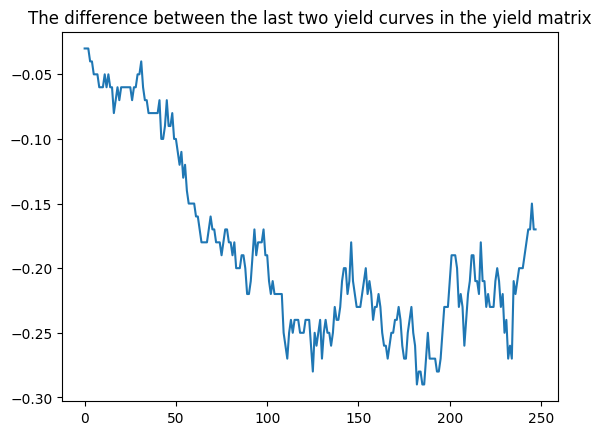

In [98]:
plt.plot(difference_list)
plt.title('The difference between the last two yield curves in the yield matrix')
plt.show()
